In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Most useful features of the dataset

| Feature         | Type         | Typical Values  | Description                                                                                                                  | Modified?                                             |
|:----------------|--------------|-----------------|------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------|
| Time            | Long integer | -               | Time reported in milliseconds                                                                                                | Yes, just the syntax, so we could plot it more easily |
| Latitude        | Decimal      | [-90.0, 90.0]   | Typical values                                                                                                               |                                                       |
| Longitude       | Decimal      | [-180.0, 180.0] | Typical values                                                                                                               |                                                       |
| Depth           | Decimal      | [0, 1000]       | Depth of the event in [km]                                                                                                   |                                                       |
| mag             | Decimal      | [-1.0, 10.0]    | Magnitude of the event                                                                                                       |                                                       |
| new_magType     | Categorical  | -               | Type of magnitude in binary form                                                                                             | Created from magType                                  |
| gap             | Decimal      | [0.0, 180.0]    | The smaller this number, the more reliable is the calculated horizontal position of the earthquake                           | Yes                                                   |
| dmin            | Decimal      | [0.4, 7.1]      | The smaller this number, the more reliable is the calculated depth of the earthquake.                                        | Yes                                                   |
| rms             | Decimal      | [0.13,1.39]     | This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location  |                                                       |
| horizontalError | Decimal      | [0, 100]        | Uncertainty of reported location of the event in kilometers. Percentage                                                      |                                                       |
| depthError      | Decimal      | [0, 100]        | Uncertainty of reported depth of the event in kilometers. Percentage                                                         |                                                       |
| magError        | Decimal      | [0, 100]        | Uncertainty of reported magnitude of the event.                                                                              | Yes                                                   |
| magNst          | Integer      | -               | The total number of seismic stations used to calculate the magnitude for this earthquake.                                    | Yes                                                   |

In [2]:
quakedf = pd.read_csv('data/chile.csv')
display(quakedf.describe())
display(quakedf.head())
display(quakedf.info())

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,4318.000000,4318.000000,4318.000000,4318.000000,0.0,3974.000000,3974.000000,4318.000000,4318.00000,4318.000000,3829.000000,3829.000000
mean,-28.199848,-70.542696,71.680783,4.387355,NaN,107.263714,0.820601,0.884567,5.81415,6.046642,0.171197,22.408723
std,5.743812,1.990156,64.887232,0.430155,NaN,51.543700,0.608376,0.261934,2.03700,3.855369,0.110326,33.405794
min,-54.249800,-76.304800,1.000000,2.500000,NaN,13.000000,0.010000,0.000000,0.00000,0.000000,0.025000,1.000000
25%,-31.730300,-71.980775,18.362500,4.100000,NaN,62.000000,0.394250,0.700000,4.50000,3.700000,0.066000,5.000000
50%,-30.260900,-71.325800,41.055000,4.300000,NaN,98.000000,0.686000,0.860000,5.50000,5.400000,0.166000,10.000000
75%,-23.053300,-68.894575,114.435000,4.500000,NaN,147.000000,1.092250,1.060000,6.90000,7.500000,0.237000,30.000000
max,-17.227200,-66.797000,286.440000,8.300000,NaN,274.000000,10.422000,2.670000,17.90000,72.800000,0.544000,493.000000


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-07-29T10:01:36.918Z,-28.2771,-67.4825,119.72,4.5,mb,NaN,47.0,2.049,0.78,...,2019-07-29T11:16:32.040Z,"25km SSE of Tinogasta, Argentina",earthquake,7.8,8.7,0.058,88.0,reviewed,us,us
1,2019-07-28T11:16:56.730Z,-24.1272,-67.1311,209.54,4.1,mb,NaN,59.0,1.514,0.72,...,2019-07-28T11:52:41.040Z,"83km W of San Antonio de los Cobres, Argentina",earthquake,9.8,9.6,0.213,6.0,reviewed,us,us
2,2019-07-27T05:15:49.343Z,-24.2585,-67.3734,195.11,4.0,mb,NaN,74.0,1.495,0.56,...,2019-07-27T06:23:37.040Z,"107km W of San Antonio de los Cobres, Argentina",earthquake,8.7,8.8,0.231,5.0,reviewed,us,us
3,2019-07-26T23:22:26.265Z,-29.3847,-72.0229,9.56,4.4,mwr,NaN,134.0,0.865,0.64,...,2019-07-27T21:45:40.040Z,"91km NW of Coquimbo, Chile",earthquake,3.8,5.9,NaN,NaN,reviewed,us,guc
4,2019-07-26T07:38:02.308Z,-19.7661,-70.8364,17.63,4.3,mwr,NaN,117.0,0.831,0.78,...,2019-07-26T08:12:07.040Z,"88km NW of Iquique, Chile",earthquake,4.9,3.2,0.048,41.0,reviewed,us,us


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 22 columns):
time               4318 non-null object
latitude           4318 non-null float64
longitude          4318 non-null float64
depth              4318 non-null float64
mag                4318 non-null float64
magType            4318 non-null object
nst                0 non-null float64
gap                3974 non-null float64
dmin               3974 non-null float64
rms                4318 non-null float64
net                4318 non-null object
id                 4318 non-null object
updated            4318 non-null object
place              4318 non-null object
type               4318 non-null object
horizontalError    4318 non-null float64
depthError         4318 non-null float64
magError           3829 non-null float64
magNst             3829 non-null float64
status             4318 non-null object
locationSource     4318 non-null object
magSource          4318 non-null object
dtyp

None

## Comienzo de Análisis de features de las que se van a prescindir.

En este caso, bajo el criterio de que las variables sean no numéricas o que tengan demasiados datos faltantes.

In [3]:
quakedf.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [4]:
quakedf['time'] = pd.to_datetime(quakedf['time'])
quakedf.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                4318
gap                 344
dmin                344
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError       0
depthError            0
magError            489
magNst              489
status                0
locationSource        0
magSource             0
dtype: int64

### Análisis de Features
Aquí notamos que inmediatamente podemos eliminar la feature nst, pero también tenemos otras features con valores nulos. Sin embargo, no necesariamente podemos deshacernos de ellas, sino que podemos considerarlas añadiendo la media de los datos a los valores faltantes.

In [5]:
time_sorted_df=quakedf.sort_values(by=['time'])
time_sorted_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
4317,2015-07-23 14:21:24.700,-23.9425,-66.8985,242.39,4.5,mb,NaN,77.0,2.275,0.82,...,2015-10-22T20:04:54.040Z,"66km WNW of San Antonio de los Cobres, Argentina",earthquake,9.5,17.2,0.540,1.0,reviewed,us,us
4316,2015-07-23 17:28:05.000,-31.9130,-71.1030,65.10,4.1,mb,NaN,NaN,NaN,1.41,...,2015-10-22T20:04:54.040Z,"19km SW of Salamanca, Chile",earthquake,6.0,6.0,0.198,7.0,reviewed,guc,us
4315,2015-07-24 23:14:39.560,-20.2963,-70.2472,34.03,5.3,mww,NaN,83.0,0.112,1.26,...,2017-10-11T21:09:48.860Z,"13km SW of Iquique, Chile",earthquake,4.4,3.7,NaN,NaN,reviewed,us,us
4314,2015-07-25 00:50:07.000,-26.9420,-70.8260,55.10,4.1,mwr,NaN,NaN,NaN,1.40,...,2015-10-22T20:04:57.040Z,"67km NW of Copiapo, Chile",earthquake,5.6,6.2,0.058,29.0,reviewed,guc,us
4313,2015-07-25 19:09:47.700,-32.0748,-69.9355,98.42,4.4,mwr,NaN,77.0,0.861,0.69,...,2015-10-22T20:04:59.040Z,"96km SSW of Calingasta, Argentina",earthquake,6.0,5.0,0.056,31.0,reviewed,us,us


## Binary encoding para la variable magType

In [6]:
import category_encoders as ce
quakedf_cp = quakedf.copy()
encoder = ce.BinaryEncoder(cols=['magType'])
df_binary = encoder.fit_transform(quakedf_cp)
df_binary.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType_0             0
magType_1             0
magType_2             0
magType_3             0
nst                4318
gap                 344
dmin                344
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError       0
depthError            0
magError            489
magNst              489
status                0
locationSource        0
magSource             0
dtype: int64

## Filtrado de datos no numericos para la copia con transformacion binaria


In [10]:
numerical_df_binary=df_binary[['time','latitude', 'longitude', 'depth', 'mag', 'magType_0', 'magType_1', 'magType_2', 'magType_3',
       'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst']]
numerical_df_binary.head()

,time,latitude,longitude,depth,mag,magType_0,magType_1,magType_2,magType_3,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,2019-07-29 10:01:36.918,-28.2771,-67.4825,119.72,4.5,0,0,0,1,47.0,2.049,0.78,7.8,8.7,0.058,88.0
1,2019-07-28 11:16:56.730,-24.1272,-67.1311,209.54,4.1,0,0,0,1,59.0,1.514,0.72,9.8,9.6,0.213,6.0
2,2019-07-27 05:15:49.343,-24.2585,-67.3734,195.11,4.0,0,0,0,1,74.0,1.495,0.56,8.7,8.8,0.231,5.0
3,2019-07-26 23:22:26.265,-29.3847,-72.0229,9.56,4.4,0,0,1,0,134.0,0.865,0.64,3.8,5.9,NaN,NaN
4,2019-07-26 07:38:02.308,-19.7661,-70.8364,17.63,4.3,0,0,1,0,117.0,0.831,0.78,4.9,3.2,0.048,41.0


## Se filtran los datos no numéricos, se transforma la variable categórica magType para distinguir entre magnitudes: 

Se elimina: 

- nst
- 

'mb':0,'mwr':1,'mww':2,'ml':3,'md':4,'mb_lg':5

## Se hace matriz de correlación para el estudio de las features

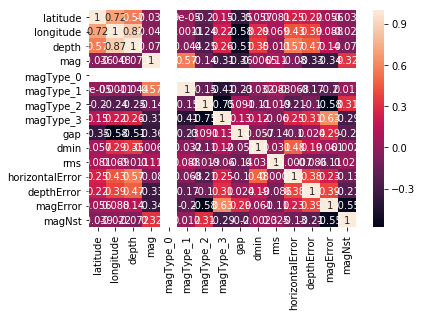

In [12]:
corrmatrix=numerical_df_binary.corr()
sns.heatmap(corrmatrix, robust=True, annot=True)

In [9]:
display(corrmatrix)

,latitude,longitude,depth,mag,magType_0,magType_1,magType_2,magType_3,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,0.715196,0.571496,-0.035974,NaN,0.000090,-0.195716,0.153423,-0.352684,0.057017,0.081484,0.248932,0.219628,0.055786,-0.039106
longitude,0.715196,1.000000,0.869241,-0.047841,NaN,0.001101,-0.239875,0.220439,-0.584517,0.291028,0.068546,0.432860,0.387673,0.087740,-0.022021
depth,0.571496,0.869241,1.000000,-0.073332,NaN,-0.044412,-0.253486,0.263889,-0.510177,0.347551,-0.011106,0.570888,0.472758,0.144661,-0.072480
mag,-0.035974,-0.047841,-0.073332,1.000000,NaN,0.567956,-0.135549,-0.313102,-0.362201,-0.006505,0.108971,-0.079755,-0.333213,-0.341570,0.320755
magType_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magType_1,0.000090,0.001101,-0.044412,0.567956,NaN,1.000000,-0.146081,-0.414324,-0.230851,-0.031665,0.087513,-0.068178,-0.174549,-0.198270,0.012318
magType_2,-0.195716,-0.239875,-0.253486,-0.135549,NaN,-0.146081,1.000000,-0.748781,0.090640,-0.107448,-0.018721,-0.213587,-0.101101,-0.581193,0.307800
magType_3,0.153423,0.220439,0.263889,-0.313102,NaN,-0.414324,-0.748781,1.000000,0.125511,0.117859,-0.060086,0.253284,0.310260,0.627842,-0.287758
gap,-0.352684,-0.584517,-0.510177,-0.362201,NaN,-0.230851,0.090640,0.125511,1.000000,-0.056919,-0.135615,-0.100534,0.024170,0.286637,-0.203158
dmin,0.057017,0.291028,0.347551,-0.006505,NaN,-0.031665,-0.107448,0.117859,-0.056919,1.000000,0.030559,0.480792,0.192039,0.061203,-0.002331


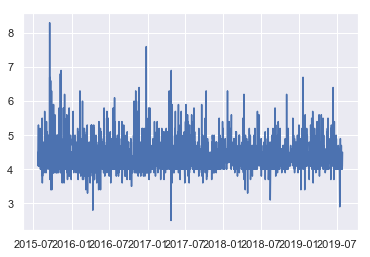

In [19]:
sns.set()
ax1=plt.subplot()
plt.plot(numerical_df_binary['time'], numerical_df_binary['mag'])

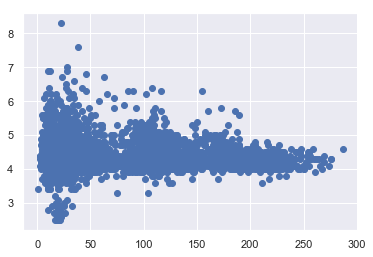

In [22]:
ax2=plt.subplot()
plt.scatter(numerical_df_binary['depth'], numerical_df_binary['mag'])